# Introduction 

Write an introductory chapter for your report
<br>
- Explain what is the purpose of this task?
- Describe, what kind of data were used? Where did it originate? Give correct reference.
- Which methods did you use?
- Describe shortly the results

Rice (Oryza sativa L.) has supported a greater number of people for a longer period of time than any other crop since it was domesticated between 8,000 to 10,000 years ago (Greenland, 1997). At present, rice is the staple food for more people than wheat, and 90 percent of total rice production is grown and consumed in Asia (Evans, 1998). As such, accurate classification of different varieties of rice is crucial for optimizing agricultural practices, improving crop management, and ensuring food safety.
<br> Machine learning algorithms can play a crucial role in automating the identification of rice varieties, which can be a time-consuming and labor-intensive task for human experts. By leveraging advanced algorithms and techniques for data analysis, machine learning can help to identify patterns and extract features from large datasets of rice images, which can then be used to classify different varieties of rice.
<br> During the different stages of this project we were able to gather and analyze 300 sampled images of three different varieties of rice, "Arborio", "Basmati" and "Jasmine", which were collected by the research group in the department of Computer Engineering, in Selcuk University. The images were preprocessed and feature-extracted using a combination of color and dimension features. The new data was then used to perform a preliminary data analysis and exploration to try and find hidden clues and patterns in the data to help guide the modeling step.
<br> Several machine learning algorithms were trained and tested on the dataset, including k-nearest neighbors (KNN), Random Forest (RF), and Multilayer perceptron (MLP). The performance of each algorithm was evaluated using nested cross validation, using 10-fold cross validation for outer loop and 5-fold repeated cross validation with 3 repetitions for inner loop. Eventually, we also calculated the accuracy and the confusion matrix for each model to better judge the model performance.
<br> The results showed that the Random Forest algorithm achieved the highest accuracy of 98,67% in classifying different rice species, followed by KNN with an accuracy of 98,33%. Final notes and conclusions demonstrated the potential of machine learning algorithms in automating the identification of rice species, which can have significant implications for improving agricultural practices and ensuring food safety.

# Part 3

## Performance estimation

Use the previously gathered data (again, use the standardized features). <br>
Estimate the performance of each model using nested cross validation. Use 10-fold cross validation for outer and <br>
5-fold repeated cross validation with 3 repetitions for inner loop.  <br> 
Select the best model in the inner loop using the hyperparameter combinations and ranges defined in the Part 2. <br>
For each model, calculate the accuracy and the confusion matrix. <br> 
Which hyperparameter/hyperparameter combination is most often chosen as the best one for each classifier? 

In [14]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
# importing data 
data = pd.read_parquet('../training_data/rice_feature_data.parquet')

In [16]:
# Standardize the data

# extract the labels
labels = data.iloc[:, -2:]

# extract the numerical features
features = data.iloc[:, :-2]

# standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# create a new data frame with standardized features and labels
standardized_df = pd.DataFrame(standardized_features, columns=features.columns)
standardized_df = pd.concat([standardized_df, labels], axis=1)

In [17]:
standardized_df

,mean_b,var_b,skew_b,kurt_b,entr_b,mean_g,var_g,skew_g,kurt_g,entr_g,...,kurt_r,entr_r,major_axis_length,minor_axis_length,area,perimeter,roundness,aspect_ratio,class,class_int
0,0.396251,2.681051,0.059767,-0.731612,0.322262,1.161240,3.412727,-0.367326,-0.806359,0.201358,...,-0.925652,0.306781,-0.839521,0.941032,0.136762,-0.533615,0.994183,-1.046037,Arb,0
1,-0.971039,-0.533707,0.562167,-0.171077,0.068750,-1.381600,-1.005674,0.225577,0.161922,-0.585434,...,0.407264,-0.812907,-1.115487,0.622454,-0.518992,-1.186728,1.493185,-1.080946,Arb,0
2,-0.228707,-0.187133,0.135625,-0.493440,0.538448,-0.184878,-0.572103,-0.702846,-0.250330,-0.020867,...,-0.207167,-0.110771,-1.076695,0.452525,-0.662130,-1.077008,1.025026,-0.998410,Arb,0
3,0.318334,1.319911,-0.869668,-0.164311,0.724261,1.277638,1.348599,-1.581537,0.035068,0.305043,...,0.153871,0.533864,-0.982067,1.164369,0.122308,-0.628372,1.167168,-1.187910,Arb,0
4,-1.704427,1.136049,-0.310871,-0.545439,0.827434,-0.919257,0.916752,-1.061714,-0.415295,0.373460,...,-0.416213,0.375291,-0.872028,1.238729,0.366982,-0.530795,1.277529,-1.156844,Arb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.270140,-0.600544,-0.749270,1.344285,-0.632409,-0.493990,-1.108474,-0.982826,2.554373,-1.539964,...,3.277091,-1.621471,-0.744655,-0.636783,-1.260065,-1.080133,0.134032,-0.257376,Jas,2
296,0.709621,-0.766539,-0.680002,0.981679,-0.889967,0.777061,-1.070058,-0.240562,1.209151,-1.340459,...,1.835829,-1.732719,-0.526309,-1.061505,-1.337628,-0.851064,-0.378086,0.212109,Jas,2
297,-0.259206,-0.879783,1.181084,0.027893,-0.756942,-0.534882,-1.265889,1.129517,0.676681,-1.406119,...,0.844677,-1.489310,-0.817683,-0.673422,-1.455029,-1.233954,0.124523,-0.284691,Jas,2
298,1.790660,-1.332054,-3.133144,3.006603,-4.037184,3.212536,-1.724036,-3.325297,3.050681,-4.841039,...,-0.124913,-1.854094,1.075870,0.100342,1.399971,1.317350,-0.572875,0.415839,Jas,2


In [18]:
X = standardized_features
y = data['class_int']

### K Nearest Neighbors

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
# Define the parameter grid for KNN
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)


# Define the inner loop with 5-fold cross-validation repeated 3 times
inner_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)

# Define the outer loop with 10-fold cross-validation
outer_cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=123)

# Initialize lists to store the accuracy scores, confusion matrices, and chosen hyperparameters
scores = []
conf_matrices = []
hyperparams = []

# Initialize the knn classifier
knn = KNeighborsClassifier()

# Loop over the outer folds

for fold, (train_index, test_index) in enumerate(outer_cv.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize a grid search over the parameter grid using the inner loop
    grid_search = GridSearchCV(knn, param_grid, cv=inner_cv, scoring="accuracy")
    
    # Fit the grid search on the training data
    grid_search.fit(X_train, y_train)
    
    # Use the best estimator to predict on the test data
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Get the best hyperparameter and store it
    best_param = grid_search.best_params_["n_neighbors"]
    hyperparams.append(best_param)
    
    # Calculate and store the accuracy score and confusion matrix for the best model
    score = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    scores.append(score)
    conf_matrices.append(conf_matrix)
    
    # Print the accuracy score and confusion matrix for the best model
    print(f"Fold {fold}:")
    print(f"Accuracy score: {score:.4f}\n")
    print(f"Confusion matrix:\n{conf_matrix}\n")
    print(f"Chosen hyperparameter: {best_param}\n")
    print('---------------------\n')

# Print the mean and standard deviation of the accuracy scores
print(f"Nested CV accuracy score: {np.mean(scores):.4f} +/- {np.std(scores):.4f}")


Fold 1:
Accuracy score: 0.9667

Confusion matrix:
[[10  0  0]
 [ 0 12  0]
 [ 1  0  7]]

Chosen hyperparameter: 5

---------------------

Fold 2:
Accuracy score: 1.0000

Confusion matrix:
[[13  0  0]
 [ 0  5  0]
 [ 0  0 12]]

Chosen hyperparameter: 2

---------------------

Fold 3:
Accuracy score: 0.9667

Confusion matrix:
[[ 7  0  0]
 [ 0 12  1]
 [ 0  0 10]]

Chosen hyperparameter: 1

---------------------

Fold 4:
Accuracy score: 1.0000

Confusion matrix:
[[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]

Chosen hyperparameter: 1

---------------------

Fold 5:
Accuracy score: 0.9667

Confusion matrix:
[[ 6  0  0]
 [ 0  9  0]
 [ 0  1 14]]

Chosen hyperparameter: 2

---------------------

Fold 6:
Accuracy score: 0.9667

Confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Chosen hyperparameter: 1

---------------------

Fold 7:
Accuracy score: 1.0000

Confusion matrix:
[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]

Chosen hyperparameter: 3

---------------------

Fold 8:
Accuracy score: 0.9667

Confusion

Frequency of choosing each value of k:
1 neighbors chosen : 4 times
5 neighbors chosen : 2 times
2 neighbors chosen : 2 times
3 neighbors chosen : 2 times


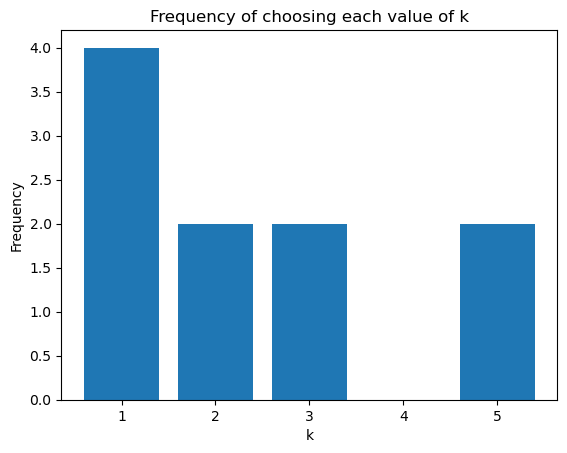

In [9]:
# Count the frequency of choosing each value of k
k_counts = {}
for k in hyperparams:
    if k not in k_counts:
        k_counts[k] = 0
    k_counts[k] += 1

# Print the frequency of choosing each value of k by descending order
print("Frequency of choosing each value of k:")
for k, count in sorted(k_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{k} neighbors chosen : {count} times")
    
# Plot the frequency of choosing each value of k
plt.bar(k_counts.keys(), k_counts.values())
plt.xlabel("k")
plt.ylabel("Frequency")
plt.title("Frequency of choosing each value of k")
plt.show()

Based on the above results it seems like the value of k = 1 was the most frequently chosen hyperparameter value, as it was chosen 4 times as the best hyperparameter for the classifier

### Random forest

In [19]:
# Define the parameter grid for the random forest
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
}


# Define the inner loop with 5-fold cross-validation repeated 3 times
inner_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)

# Define the outer loop with 10-fold cross-validation
outer_cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=123)

# Initialize lists to store the accuracy scores, confusion matrices, and chosen hyperparameters
scores = []
conf_matrices = []
hyperparams = []

# Initialize the random forest classifier
rf = RandomForestClassifier(random_state=123)

# Loop over the outer folds

for fold, (train_index, test_index) in enumerate(outer_cv.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize a grid search over the parameter grid using the inner loop
    grid_search = GridSearchCV(rf, param_grid, cv=inner_cv, scoring="accuracy")
    
    # Fit the grid search on the training data
    grid_search.fit(X_train, y_train)
    
    # Use the best estimator to predict on the test data
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Get the best hyperparameter and store it
    best_params = grid_search.best_params_
    hyperparams.append(best_params)
    
    # Calculate and store the accuracy score and confusion matrix for the best model
    score = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    scores.append(score)
    conf_matrices.append(conf_matrix)
    
    # Print the accuracy score and confusion matrix for the best model
    print(f"Fold {fold}:")
    print(f"Accuracy score: {score:.4f}\n")
    print(f"Confusion matrix:\n{conf_matrix}\n")
    print(f"Chosen hyperparameter: {best_params}\n")
    print('---------------------\n')

# Print the mean and standard deviation of the accuracy scores
print(f"Nested CV accuracy score: {np.mean(scores):.4f} +/- {np.std(scores):.4f}")


Fold 1:
Accuracy score: 0.9667

Confusion matrix:
[[10  0  0]
 [ 0 12  0]
 [ 1  0  7]]

Chosen hyperparameter: {'max_depth': 10, 'max_features': 'sqrt'}

---------------------

Fold 2:
Accuracy score: 1.0000

Confusion matrix:
[[13  0  0]
 [ 0  5  0]
 [ 0  0 12]]

Chosen hyperparameter: {'max_depth': 10, 'max_features': 'sqrt'}

---------------------

Fold 3:
Accuracy score: 0.9333

Confusion matrix:
[[ 7  0  0]
 [ 0 11  2]
 [ 0  0 10]]

Chosen hyperparameter: {'max_depth': 10, 'max_features': 'sqrt'}

---------------------

Fold 4:
Accuracy score: 1.0000

Confusion matrix:
[[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]

Chosen hyperparameter: {'max_depth': 10, 'max_features': 'sqrt'}

---------------------

Fold 5:
Accuracy score: 1.0000

Confusion matrix:
[[ 6  0  0]
 [ 0  9  0]
 [ 0  0 15]]

Chosen hyperparameter: {'max_depth': 10, 'max_features': 'sqrt'}

---------------------

Fold 6:
Accuracy score: 1.0000

Confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Chosen hyperparameter: {'ma

Frequency of choosing each hyperparameter combination:
(('max_depth', 10), ('max_features', 'sqrt')) combination chosen : 7 times
(('max_depth', 5), ('max_features', 'sqrt')) combination chosen : 3 times


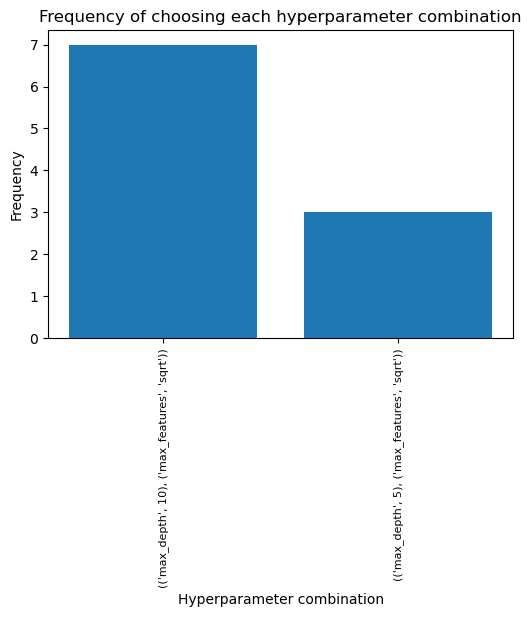

In [20]:
# Get the list of all hyperparameter combinations that were tried
combinations = [tuple(d.items()) for d in hyperparams]

# Count the frequency of choosing each hyperparameter combination
combination_counts = {}
for combo in combinations:
    if combo not in combination_counts:
        combination_counts[combo] = 0
    combination_counts[combo] += 1

# Print the frequency of choosing each hyperparameter combination
print("Frequency of choosing each hyperparameter combination:")
for combo, count in sorted(combination_counts.items(), key=lambda x: x[1], reverse=True):
    print(combo, "combination chosen :", count, 'times')

# Plot the frequency of choosing each hyperparameter combination
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(range(len(combination_counts)), list(combination_counts.values()), align='center')
ax.set_xticks(range(len(combination_counts)))
ax.set_xticklabels([str(combo) for combo in combination_counts.keys()], rotation=90, fontsize=8)
ax.set_xlabel("Hyperparameter combination")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of choosing each hyperparameter combination")
plt.show()

Based on the above results it seems like the parameter values ('max_depth', 10) and ('max_features', 'sqrt') were the most frequently chosen hyperparameter combination, as it was chosen 7 times as the best hyperparameter combination for the classifier

### MLP

In [21]:
# Define the parameter grid for the classifier
param_grid = {
    'hidden_layer_sizes': [(n,) for n in range(10, 110, 10)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'validation_fraction': [0.1, 0.5],
}


# Define the inner loop with 5-fold cross-validation repeated 3 times
inner_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)

# Define the outer loop with 10-fold cross-validation
outer_cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=123)

# Initialize lists to store the accuracy scores, confusion matrices, and chosen hyperparameters
scores = []
conf_matrices = []
hyperparams = []

# define the MLP classifier
mlp_clf = MLPClassifier(early_stopping=True, random_state= 123)

# Loop over the outer folds

for fold, (train_index, test_index) in enumerate(outer_cv.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize a grid search over the parameter grid using the inner loop
    grid_search = GridSearchCV(mlp_clf, param_grid, cv=inner_cv, scoring="accuracy")
    
    # Fit the grid search on the training data
    grid_search.fit(X_train, y_train)
    
    # Use the best estimator to predict on the test data
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Get the best hyperparameter and store it
    best_params = grid_search.best_params_
    hyperparams.append(best_params)
    
    # Calculate and store the accuracy score and confusion matrix for the best model
    score = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    scores.append(score)
    conf_matrices.append(conf_matrix)
    
    # Print the accuracy score and confusion matrix for the best model
    print(f"Fold {fold}:")
    print(f"Accuracy score: {score:.4f}\n")
    print(f"Confusion matrix:\n{conf_matrix}\n")
    print(f"Chosen hyperparameter: {best_params}\n")
    print('---------------------\n')

# Print the mean and standard deviation of the accuracy scores
print(f"Nested CV accuracy score: {np.mean(scores):.4f} +/- {np.std(scores):.4f}")


Fold 1:
Accuracy score: 0.9667

Confusion matrix:
[[10  0  0]
 [ 0 12  0]
 [ 1  0  7]]

Chosen hyperparameter: {'activation': 'relu', 'hidden_layer_sizes': (70,), 'solver': 'adam', 'validation_fraction': 0.5}

---------------------

Fold 2:
Accuracy score: 0.9333

Confusion matrix:
[[13  0  0]
 [ 0  5  0]
 [ 0  2 10]]

Chosen hyperparameter: {'activation': 'relu', 'hidden_layer_sizes': (40,), 'solver': 'adam', 'validation_fraction': 0.5}

---------------------

Fold 3:
Accuracy score: 1.0000

Confusion matrix:
[[ 7  0  0]
 [ 0 13  0]
 [ 0  0 10]]

Chosen hyperparameter: {'activation': 'relu', 'hidden_layer_sizes': (70,), 'solver': 'adam', 'validation_fraction': 0.5}

---------------------

Fold 4:
Accuracy score: 0.9667

Confusion matrix:
[[12  0  0]
 [ 0 11  0]
 [ 0  1  6]]

Chosen hyperparameter: {'activation': 'relu', 'hidden_layer_sizes': (40,), 'solver': 'adam', 'validation_fraction': 0.5}

---------------------

Fold 5:
Accuracy score: 0.9667

Confusion matrix:
[[ 6  0  0]
 [ 0  

Frequency of choosing each hyperparameter combination:
(('activation', 'relu'), ('hidden_layer_sizes', (70,)), ('solver', 'adam'), ('validation_fraction', 0.5)) combination chosen : 6 times
(('activation', 'relu'), ('hidden_layer_sizes', (40,)), ('solver', 'adam'), ('validation_fraction', 0.5)) combination chosen : 4 times


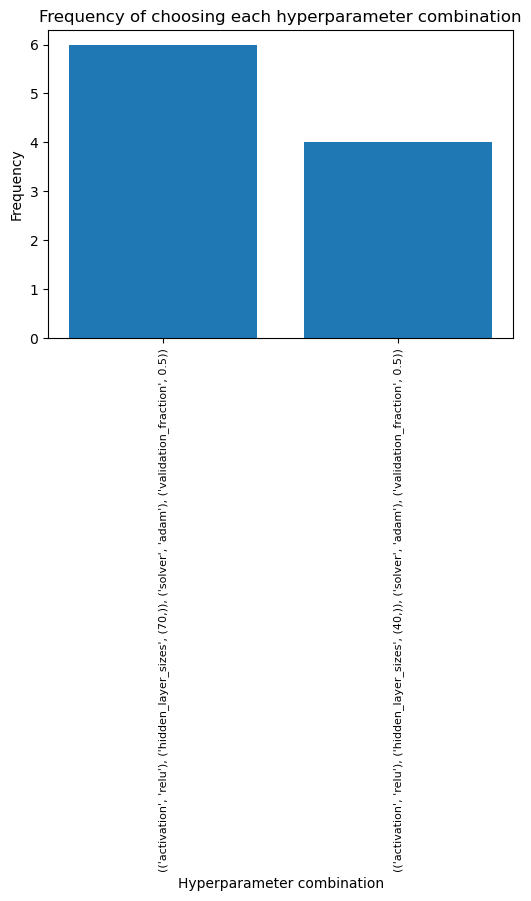

In [22]:
# Get the list of all hyperparameter combinations that were tried
combinations = [tuple(d.items()) for d in hyperparams]

# Count the frequency of choosing each hyperparameter combination
combination_counts = {}
for combo in combinations:
    if combo not in combination_counts:
        combination_counts[combo] = 0
    combination_counts[combo] += 1

# Print the frequency of choosing each hyperparameter combination
print("Frequency of choosing each hyperparameter combination:")
for combo, count in sorted(combination_counts.items(), key=lambda x: x[1], reverse=True):
    print(combo, "combination chosen :", count, 'times')

# Plot the frequency of choosing each hyperparameter combination
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(range(len(combination_counts)), list(combination_counts.values()), align='center')
ax.set_xticks(range(len(combination_counts)))
ax.set_xticklabels([str(combo) for combo in combination_counts.keys()], rotation=90, fontsize=8)
ax.set_xlabel("Hyperparameter combination")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of choosing each hyperparameter combination")
plt.show()

Based on the above results it seems like the parameter values ('activation', 'relu'), ('hidden_layer_sizes', (70,)), ('solver', 'adam'), ('validation_fraction', 0.5) was the most frequently chosen hyperparameter combination, as it was chosen 6 times as the best hyperparameter combination for the classifier

## Discussion 

- <font color='red'>Which model performs the best? Why?</font> 
<br> Based on the previous results, it looks like the  Random forest classifier performs the best, with an average accuracy of 98,67%. This may be due to various reasons such as the ability of the Random forest classifier to model non-linear relationships by combining multiple decision trees. This means that the model is able to capture complex relationships in the data, even if the data is not linearly separable. In contrast, KNN classifiers are based on simple distance metrics and may struggle to model non-linear relationships in the data. MLP classifiers can model non-linear relationships, but may require more complex architectures and more data to do so. Another possible reason of this performance could be the ability of RF models to providing a measure of variable importance, which can be useful for feature selection and interpretation. This can help to identify the most important features for predicting the target variable and improve classification performance. 
- <font color='red'>Ponder the limitations and generalization of the models. How well will the classifiers perform for data outside this data set?</font> 
<br> While it can be difficult to directly judge for sure how well the classifiers will perform on new, unseen data based solely on the results obtained from the obtained accuracy values, as we would need to evaluate the models on an independent validation set. However, a number of 10 cross-validation iteration folds was used to control the generalization ability of the algorithms, and by calculating the average performance across all the folds of the cross-validation, we can get an estimate of how well the algorithms are likely to perform on new data from the same distribution as the training data. And based on our results all models achieved an average accuracy higher that 97% which seems promissing.
- <font color='red'> Compare your results with the original article. Are they comparable?</font> 
<br> For the most part, the obtained results seem very similar to the ones mentionned in the original article. For both cases, over 97% success was achieved in all the algorithms, with the Random forest classifier having the best perormance.
- <font color='red'> Ponder applications for these type of models (classifying rice or other plant species), who could benefit from them? Ponder also what would be interesting to study more on this area?</font> 
<br> Classifying rice or other plant species can be of great benefit to various parties such as food scientists for example, as they can benefit from plant classification by identifying different varieties of rice or other plants in general and studying their nutritional content, cooking properties, and sensory characteristics. This can help to develop new food products, optimize food processing techniques, and improve the general quality and safety of the food supply.
<br> Some interesting areas of study in this field could include developing new machine learning algorithms and computer vision techniques to study and monitor the impact of environmental factors such as climate change on different plant species, by monitoring their growth and analyzing the different image input to detect any possible anomaly resulting from environmental factors 
- <font color='red'> What did you learn? What was difficult? Could you improve your own working process in some way?</font> 
<br> This project was beneficial on so many levels, this was my first experience working with image data, and it was very interesting to see how to turn the image observations into a set of features that the algorithms can learn from and make predictions. The evaluation process was also very interesting as I got to test different models and see how each model would behave in different situations with the different hyperparameter combinations. I would say the most challenging part for me was in part 2 where we were trying to plot the accuracy versus the hyperparameter/hyperparameter combination and highlight the best value, thinking about all the different ways we could produce such plots especially when we have multiple hyperparameter combinations was for sure challenging. From a subjective point of view, I could say that I should definitely work on my code optimization, while most of the times I find myself reaching the goal of the task, I can't help but think that I could work more on improving the code quality and efficiency.